<a href="https://colab.research.google.com/github/nalinis07/APT_Ref_Copy_Links/blob/MASTER/AT_Lesson_143_Reference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 143: Land Cover Classification

---

**WARNING:** The reference notebook is meant **ONLY** for a teacher. Please **DO NOT** share it with any student.

The contents of the reference notebook are meant only to prepare a teacher for a class. To conduct the class, use the class copy of the reference notebook. The link and the instructions for the same are provided in the **Notes To The Teacher** section.


|Particulars|Description|
|-|-|
|**Topic**|Land Cover Classification|
|||
|**Class Description**|In this class, a student will further explore Sundarbans satellite data and classify the land cover using Python|
|||
|**Class**|C143|
|||
|**Class Time**|50 minutes|
|||
|**Goal**|Obtain water and mineral indices|
||Interpret the Ground Truth data|
||Classify the land cover from satellite dataset|
|||
|**Teacher Resources**|Google Account|
||Laptop with internet connectivity|
||Earphones with mic|
|||
|**Student Resources**|Google Account|
||Laptop with internet connectivity|
||Earphones with mic|

---

### Warm-up Quiz

```
TEACHER
I have an exciting quiz question for you! Are you ready to answer this question?

EXPECTED STUDENT RESPONSE
Yes.
```

**Instructions for the Teacher:**
- Please click on the "Quiz Time" button on the bottom right corner of your screen to start the In-Class Quiz. <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/quiz-time.png' width = 150>

- A quiz will be visible to both you and the student. Encourage the student to answer the quiz question.

- The student may choose the wrong option, help the student to think correctly about the question and then answer again.

- After the student selects the correct option, the "End Quiz" button will start appearing on your screen. <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/end-quiz.png' width = 150>  

- Click the "End quiz" button to close the quiz pop-up and continue the class.
  
- Do not spend more than 2 minutes on this quiz.

---

#### Teacher-Student Activities

In the previous classes, we explored satellite data for Sundarbans using Python EarthPy package. We also computed various vegetation indices to estimate the density of greenness on an area of land. Let us first import the satellite dataset of Sundarbans region and have a recap of previous class activities.



---

#### Recap

**Sundarbans**

Sundarbans is the world's largest mangrove forest covering an area of about 10,000 sq km. It is situated in the river [delta](https://en.wikipedia.org/wiki/Ganges_Delta) formed at the confluence on rivers Ganga, Brahmaputra, and Meghna rivers in Bay of Bengal. Sundarbans are enlisted in [UNESCO World Heritage Sites](https://en.wikipedia.org/wiki/World_Heritage_Site).


<br>

#### Sentinel-2

[Sentinel-2](https://en.wikipedia.org/wiki/Sentinel-2) is a mission in the European Union's [Copernicus](https://en.wikipedia.org/wiki/Copernicus_Programme) Earth observation programme.

- The Sentinel-2 satellite data has 954 $\times$ 298 pixels and  consists of **13 bands** in the visible, near infrared, and short wave infrared spectrum. However, we will be using 12 bands for obtaining various vegetation indices.

  **Note:** You can download Sentinel-2 data from [Copernicus Open Access Hub](https://scihub.copernicus.eu/dhus/#/home) which provides complete, free and open access to Sentinel-1, Sentinel-2, Sentinel-3 and Sentinel-5P data. However, the procedure of extracting and obtaining satellite data from this hub is beyond the scope of this course.  



---

#### Downloading Dataset

Let us first install `earthpy` package using `! pip install` command. This will also install `rasterio` package needed for reading and writing raster data.

In [ ]:
# Install 'earthpy' package.

! pip install earthpy

     |████████████████████████████████| 1.4 MB 5.6 MB/s 
     |████████████████████████████████| 1.0 MB 26.3 MB/s 
     |████████████████████████████████| 19.3 MB 1.8 MB/s 
     |████████████████████████████████| 16.7 MB 196 kB/s 
     |████████████████████████████████| 6.3 MB 9.3 MB/s 


We will use a small part of the Sundarbans satellite data which was acquired using the Sentinel-2 Satellite on 27 January 2020.

To download the dataset, run the below code cell. This code will create a copy of the files located in the Github folder in the local runtime environment.

**Dataset link:** https://github.com/whitehatjr-test/sundarbans_data


In [ ]:
# Run the code to download the sundarbans tiff files in local runtime environment.

! git clone https://github.com/whitehatjr-test/sundarbans_data.git

# Grab files containing "B" and that end with .tiff
import glob as gb
sundarbans_path = gb.glob("/content/sundarbans_data/*B*.tiff")

# Sort the spectral bands (if not in sorted order).
sundarbans_path.sort()

Cloning into 'sundarbans_data'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 19 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (19/19), done.


Now that we have obtained all the 12 spectral bands inside a list, plot different band combinations.

---

#### Plotting RGB Composite Image

For creating a color RGB image, we need all of the 12 bands together in the same file or "stack". Hence, we will stack the information from all the 12 raster bands. Next, plot the stacked raster bands to visualise the 12 raster band layers of Sentinel-2 data using the EarthPy `plot_bands()` function.



In [ ]:
# Import the required library
import rasterio as rio

# Open and read all 12 bands using rasterio.
all_bands = []

for path in sundarbans_path:
  with rio.open(path) as file:
    all_bands.append(file.read(1))

print("Number of 2D arrays:",len(all_bands))

# Stack all the spectral bands in a list using 'np.stack()' function.
import numpy as np
arr_st = np.stack(all_bands)

# Plot all the 12 spectral bands using 'plot_bands()' function.
# Use 'cols = 6' attribute to display maximum 6 bands in a single row
import earthpy.plot as epp
import matplotlib.pyplot as plt
# epp.plot_bands(arr_st, cols = 6)
# plt.show()

Number of 2D arrays: 12


**Note:** To shorten the lesson majority of plots obtained in previous lesson have been supressed via comments. If you want to have a detail recap. Remove the `#` and obtain the corresponding plots.

<br>

Combine these bands to create a true color composite image or an RGB image. To plot 3 band color composite images, use `plot_rgb()` function of `earthpy.plot` module.

Refer to the sentinel-2 bands given in the table below to recognise the red, green and blue bands.

<img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/3bfa3dc5-2697-48a9-b050-877175edb84b.PNG"/>


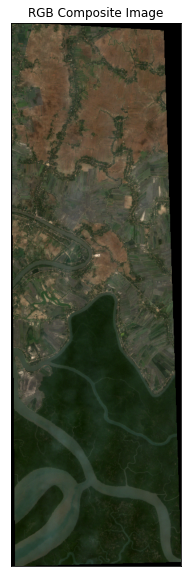

In [ ]:
# Create a RGB composite image
epp.plot_rgb(arr_st, rgb = (3, 2, 1), title ='RGB Composite Image')
plt.show()

To increase the visual contrast, use  `stretch = True` attribute inside the `plot_rgb()` function. Also, specify `str_clip = 0.5` to brighten the image.

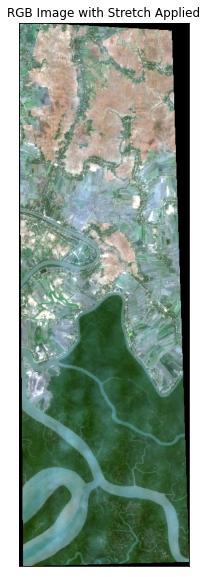

In [ ]:
# Stretch the RGB composite image with str_clip = 0.5
epp.plot_rgb(arr_st, rgb = (3, 2, 1), stretch = True, str_clip = 0.5,
             title = "RGB Image with Stretch Applied")

plt.show()

---

#### Calculating Vegetation Indices

- NDVI

- RENDVI

- EVI

In [ ]:
#  Plot NDVI
import earthpy.spatial as es
import warnings
warnings.filterwarnings("ignore")

ndvi = es.normalized_diff(arr_st[7], arr_st[3])
# epp.plot_bands(ndvi, cmap="RdYlGn", cols = 1, vmin = -1, vmax = 1, figsize = (10, 14))
# plt.show()

In [ ]:
# Plot RENDVI
import warnings
warnings.filterwarnings("ignore")

rendvi = es.normalized_diff(arr_st[7], arr_st[4])
# epp.plot_bands(rendvi, cmap = "RdYlGn", vmin = -1, vmax = 1)
# plt.show()

In [ ]:
# Plot EVI
import warnings
warnings.filterwarnings("ignore")

evi = 2.5 * (arr_st[7] - arr_st[3]) / (arr_st[7] + (6.0 * arr_st[3]) - (7.5 * arr_st[1]) + 1.0)
# epp.plot_bands(evi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1)
# plt.show()

These were the indices obtained in the previous class.

<br>

Let's start with the activities of this lesson.

---

#### **Objective**

In today's class:

1. We will explore water and mineral indices to analyse satellite data for Sundarbans dataset.

2. We will also use **`kNN`** classifier model to classify the land cover from the satellite dataset.

---

#### Activity 1: Water Indices

Water indices provides information on the presence of surface water, moisture, humidity levels or other water related parameters for the geographic area under study.

First let us explore and obtain **NDWI**

<br>

####  **Normalized Difference Water index (NDWI)**

[NDWI](https://en.wikipedia.org/wiki/Normalized_difference_water_index) is one of the most common water index which is used to monitor leaves water content and plant humidity levels. It primarily indicates changes in water content of leaves.

Plant humidity is an important indicator used to predict wildfires and identification of susceptible regions. A low level humidity indicates an environment susceptible to wild fires. This index is particularly useful when the geographic location has a mix of live and dry vegetation in the region.

**How to calculate NDWI?**

- NDWI uses a ratio between near-infrared (NIR) and short-wave infrared (SWIR) bands within the electromagnetic spectrum.
- To calculate NDWI, we use the following formula:

$$\text{NDWI}=\frac{\text{NIR} - \text{SWIR}}{\text{NIR} + \text{SWIR}}$$

**Note:** For NDWI calculations the SWIR should be centered around 2200 nm. For our raster data, band 12 has a center frequency of 2190 nm which is close to the desired range.

<br>

For our raster data,
  - NIR is at band 8: `arr_st[7]` (index starts from 0).
  - SWIR is at band 12: `arr_st[10]`.

<br>

  Similar to the calculation of NDVI, we will use `normalized_diff()` function of `earthpy.spatial` module to calculate NDWI.

Obtain the `ndwi` by passing relevant values to `normalized_diff` and obtain a plot using `plot_bands()` function. Use the following attributes of `plot_bands()` function to customise the NDWI image:
- `cmap ="ocean"`: To set colours for the colormap.
- `vmin = -1` and `vmax = 1`: To set the range of values to use for the colormap.

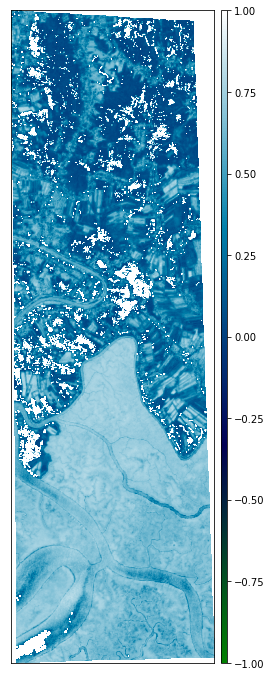

In [ ]:
# S1.1: Obtain and plot NDWI
import warnings
warnings.filterwarnings("ignore")

ndwi = es.normalized_diff(arr_st[7], arr_st[10])
epp.plot_bands(ndwi, cmap="ocean", cols=1, vmin=-1, vmax=1)
plt.show()

From the above plot we can conclude:

1. As expected the portion of the barren land (the top half) displays a lack of moisture.

2. The dense vegetation displays a high level of water content in the plant leaves.

<br>

However, an important thing to note when using NDWI, the level of moisture in the densely vegetated area is quite similar to the intensity of the light we get for surface water (i.e. water bodies).

This means differentiating between surface water bodies and dense vegetation might pose a challenge if we solely rely on NDWI. To overcome this challenge we can use **modified** normalized difference water index.

<br>

#### The Modified Normalized Difference Water Index (MNDWI)

The [MNDWI](https://en.wikipedia.org/wiki/Normalized_difference_water_index) uses green and SWIR bands in order to obtain the water index. It facilitates in recognition of open water channels, thereby we can easily differentiate between humidity levels and presence of surface water bodies.

- To calculate MNDWI, we use the following formula:

$$\text{MNDWI}=\frac{\text{Green} - \text{SWIR}}{\text{Green} + \text{SWIR}}$$

**Note:** For MNDWI calculations the SWIR should be centered around 2200 nm. For our raster data, the band 12 has a center frequency of 2190 nm which is close to the desired range.

<br>

  Similar to the calculation of NDWI, we will use `normalized_diff()` function of `earthpy.spatial` module to calculate MNDWI.

For our raster data,
  - Green is at band 3: `arr_st[2]`.
  - SWIR is at band 12: `arr_st[10]`.

Obtain the `mmdwi` by passing relevant values to `normalized_diff` and obtain a plot using `plot_bands()` function. Use the following attributes of `plot_bands()` function to customise the NDVI image:
- `cmap ="ocean"`: To set colours for the colormap.
- `vmin = -1` and `vmax = 1`: To set the range of values to use for the colormap.

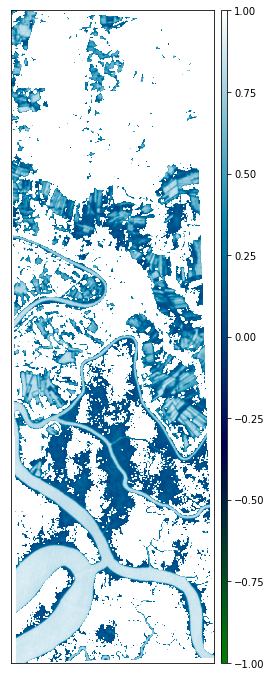

In [ ]:
# S1.2: Obtain and plot MNDWI
import warnings
warnings.filterwarnings("ignore")

mndwi = es.normalized_diff(arr_st[2], arr_st[10])
epp.plot_bands(mndwi, cmap = "ocean", vmin = -1, vmax = 1)
plt.show()

Here, we can observe that the MNDWI provides a clear differentiation for the water bodies and the vegetation water/humidity levels. However, the plot from the MNDWI also displays surface atmospheric humidity levels thus displays high water content even for the barren land, which is almost equivalent to the plant humidity levels.

Let us compare the RGB composite image plot with the plots obtained for water indices.

<center><img src=https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/e14e4525-4b6e-4208-a723-abb3a48772c5.png width=800></center>

The comparison clearly reveals the shortcomings of both the water indices:

- Using NDWI it might be challenging to differentiate between open water bodies and vegetation area with higher humidity levels.

- MNDWI clearly differentiates between open water bodies but it may provide incorrect information of water content on barren lands due to higher atmospheric humidity levels.

Hence, it is advisable to plot multiple indices in order to understand the presence of water bodies and recognizing vegetation with corresponding humidity levels.

<br>

Next, let us understand and obtain **Mineral Indices** for understanding the composition of soil and obtain mineral/nutrients information for the corresponding geographic location.

---

#### Activity 2: Mineral Indices

As stated earlier, Sundarbans is one of the most biologically productive of all natural ecosystems. It acts as a nutrient and sediment trap providing natural resources, supporting a wide variety of aquatic, benthic and terrestrial organisms.

Let us obtain a few indices to understand the presence of nutrients in the Sundarbans soil.

<br>

#### **Clay Mineral Ratio (CMR)**

[Clay minerals](https://en.wikipedia.org/wiki/Clay_mineral) are hydrous aluminium phyllosilicates and are formed in the presence of water. They may have variable amounts of iron, magnesium, alkali metals, alkaline earths, and other cations.

**How to calculate CMR?**

CMR is defined as the ratio of SWIR1 and SWIR2 bands. It provides information on the presence of hydrous minerals like clay, and alunite.

To calculate CMR, we use the following formula:

$$\text{CMR}=\frac{\text{SWIR}1}{\text{SWIR}2}$$

**Note:** The SWIR1 should be centered at 1610 nm, and SWIR2 should be centered at 2200 nm. For our raster data, the band 12 has a center frequency of 2190 nm which is close to the desired range.

<br>

For our raster data,
  - $\text{SWIR}1$ is at band 11: `arr_st[10]`.
  - $\text{SWIR}2$ is at band 12: `arr_st[11]`.

<br>

Use `np.divide()` function to obtain the ratio of these bands and assign the result to a variable say `cmr`.

Next, obtain a plot using `plot_bands()` function. Use the following attributes of `plot_bands()` function to customise the NDVI image:
- `cmap ="RdYlGn_r"`: To set relevant colours for the colormap.
- `vmin = -1` and `vmax = 1`: To set the range of values to use for the colormap.

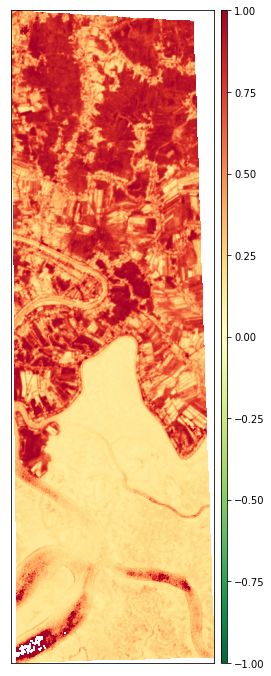

In [ ]:
# S2.1: Obtain and plot Clay Mineral Ratio
import warnings
warnings.filterwarnings("ignore")

cmr = np.divide(arr_st[10], arr_st[11])
epp.plot_bands(cmr, cmap="RdYlGn_r", cols=1, vmin=-1, vmax=1)

plt.show()

Here, we observe:

1. The barren land area is particularly rich in clay nutrients.

2. Water stream also has a good deposit of clay minerals in the waterbed.

3. The densely vegetated area does not exhibit high mineral ratio. It may be due to following factors:

  - The trees absorb a lot of nutrients thus changing the soil composition.

  - Due to dense vegetation the soil is unexposed to the Sun's radiation, hence we are not able to collect accurate data.

<br>

#### **Ferrous Minerals**

[Ferrous minerals](https://en.wikipedia.org/wiki/Ferrous) are metallic minerals having iron. Examples of ferrous minerals are iron ore, manganese to name a few.

**How to obtain Ferrous Minerals presence in Soil?**

Ferrous Minerals can be obtained from the ratio of SWIR1 and NIR bands. Ferrous minerals may include iron, iron oxide, and various alloys of iron.

- To calculate FMR, we use the following formula:

$$\text{FMR}=\frac{\text{SWIR}}{\text{NIR}}$$

**Note:** The SWIR should be centered at 1610 nm

<br>

For our raster data,
  - SWIR is at band 11: `arr_st[10]`.
  - NIR is at band 8: `arr_st[7]`.

<br>

Here, we will use `np.divide()` function to obtain the ratio of these bands.

Next obtain a plot using `plot_bands()` function. Use the following attributes of `plot_bands()` function to customise the NDVI image:
- `cmap ="RdYlGn_r"`: To set relevant colours for the colormap.
- `vmin = -1` and `vmax = 1`: To set the range of values to use for the colormap.



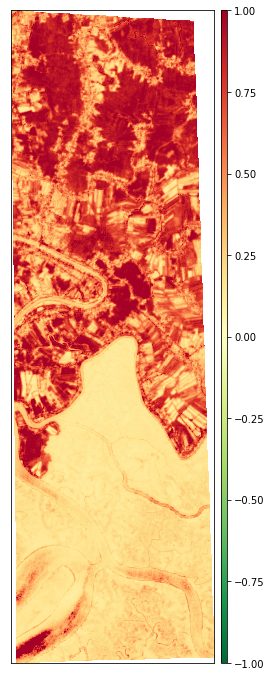

In [ ]:
# S2.1: Obtain and plot Clay Mineral Ratio

fmr = np.divide(arr_st[10], arr_st[7])
epp.plot_bands(fmr, cmap="RdYlGn_r", cols=1, vmin=-1, vmax=1)

plt.show()

Here, we observe:

1. As expected the area of the barren land is rich in ferrous minerals.

2. A portion of the water stream (bottom left) also has a good deposit of ferrous minerals in the waterbed.

3. The densely vegetated area does not exhibit high ferrous mineral ratio. It may be due to following factors:

  - The trees absorb a lot of nutrients thus changing the soil composition.

  - Due to dense vegetation the soil is unexposed to the Sun's radiation, hence we are not able to collect accurate data.

<br>

In a similar way we can obtain and plot a variety of mineral indices. Let us stop the analysis of indices here.

Next, let us compare the satellite data with Ground Truth and classify land cover from the satellite dataset using **kNN** classification algorithm.

---

#### Activity 3: Ground Truth and Data Preprocessing

**Ground Truth**

In remote sensing, [Ground Truth](https://en.wikipedia.org/wiki/Ground_truth) refers to the information collected at the location.

- Ground truth is generally obtained from the team of scientists and researchers which requires a visit in person to the corresponding geographic area.

- The ground truth provides information on real features and materials on the ground.

- The ground truth helps in calibration of remote-sensing data such as data collected by meteorology, analysis of aerial photographs, satellite imagery and other techniques.

Let us first import the ground truth data for the selected portion of Sundarbans. The ground truth information is saved in the same folder as of the raster band information was saved. The snapshot of the respective folder is given in below image:

<center><img src=https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/e911d136-e7c6-4e4e-ac07-c9d1bc859808.png width=300></center>

<br>

The ground truth is saved as: `Sundarbands_gt.mat` file. The `.mat` extension is a common filetype which is used by [MATLAB](https://en.wikipedia.org/wiki/MATLAB) and other mathematical intensive programming languages used for scientific data processing.

<br>

<br>

In order to load the corresponding file:

1. First import `loadmat` from the `scipy.io` module. The `loadmat` enables Python to import and read a `.mat` file.

2. Create a target variable, say `ground_truth` and assign it the ground truth file using: `loadmat('file_name')`.

 - file_name: /content/sundarbans_data/Sundarbands_gt.mat

3. Obtain the type of `ground_truth` data generated from the corresponding `.mat` file.

4. Finally, print the `ground_truth`.

**Note:** For further reading on `loadmat()`, visit official [scipy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.loadmat.html).

In [ ]:
# T3.1: Obtain the Ground Truth for the Sundarbans area under study.

from scipy.io import loadmat
ground_truth = loadmat('/content/sundarbans_data/Sundarbands_gt.mat')
print(type(ground_truth))
ground_truth

<class 'dict'>


{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Fri Mar  5 04:31:49 2021',
 '__version__': '1.0',
 'gt': array([[0, 0, 0, ..., 2, 2, 2],
        [0, 0, 0, ..., 2, 2, 2],
        [0, 0, 0, ..., 2, 2, 2],
        ...,
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2]], dtype=int32)}

Here, you can observe that the `loadmat()` returns a dictionary object. However, we need the information in the form of a numpy array to align ground truth information with the data obtained from the raster bands.

For this:

1. Obtain the `value` associated to the key `gt` and store it in a variable `y_data`.

2. Print the shape of `y_data`.

3. Finally, print the corresponding array.


In [ ]:
# S3.1: Convert the Ground Truth information into an array.

y_data = ground_truth['gt']
print(y_data.shape)
y_data

(954, 298)


array([[0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]], dtype=int32)

Similar to the information obtained from the raster bands we have an array of (954, 298) depicting the ground truth of the selected portion of the Sundarbans.

**Note:** This is not stacked from various bands of the satellite, hence is a single 2D array which provides pixel information for the selected geographic area.

<br>

Let's visualise this ground truth using EarthPy `plot_bands()` function so as to get an image for the ground truth. For this:

1. Import `ListedColormap` from `matplotlib.colors` to import the list of various colors supported by `matplotlib`.

2. Plot the ground truth data `y_data` using `plot_bands()` function. Pass the following parameters as input this function:
  - `y_data`.
  - `cmap = ListedColormap(['darkgreen', 'green', 'black', '#CA6F1E', 'navy', 'forestgreen'])`: To set colours for the colormap. These colours will help us render a realistic image from the ground truth data. Since, the `RdYlGn` colors used so far fail to create a realistic image for the ground truth dataset.

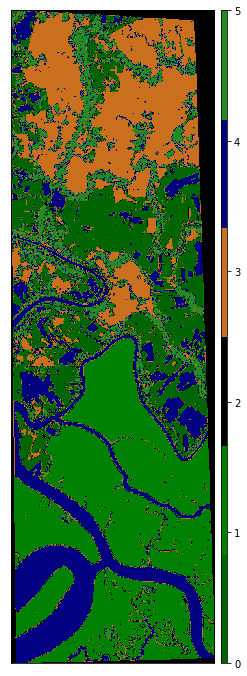

In [ ]:
# S3.2: Obtain the plot for ground truth image of the respective Sundarbans area under study

from matplotlib.colors import ListedColormap
epp.plot_bands(y_data,
              cmap=ListedColormap(['darkgreen', 'green', 'black', '#CA6F1E', 'navy', 'forestgreen']))
plt.show()

Let us compare the ground truth and RGB composite image obtained from satellite data.

<center><img src=https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/0e524657-3b96-4e48-b754-9edda6ca0371.png width=600></center>

<br>

Here, we observe that the 2 images are nearly identical and the satellite information obtained from the raster bands corresponds to the ground truth and gives us an accurate description of the area under study.

This ground truth data will be used to train the classifier as it yields the actual information from the surface. Hence, this will correspond to the `target` label for our classifier model.

---

<br>

Next, let us process the feature `x` dataset. To recall the shape of the stacked raster dataset obtained from the satellite is: (12, 954, 298). However, the shape of target is (954, 298)

Hence, we need to convert the feature array to a form similar to the target i.e. (954, 298, 12).

This change can be thought of as changing the orientation of the stack. Refer the below image for visual interpretation of changing stack orientation:

<center><img src=https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/64cb47e3-d7bb-4e00-b6a3-f355080380a2.png width=500></center>


<br>

#### `numpy.moveaxis()` function.

The `moveaxis()` function of `numpy` module moves axes of an array to new positions.

**Syntax of moveaxis() function:** `moveaxis(a, source, destination)`

Parameters
- `a`: The array whose axes should be reordered.

- `source` - int or sequence of int: Original positions of the axes to move.

- `destination` - int or sequence of int: Destination positions for each of the original axes.

As depicted in the figure shown below we will move the axes (12) to the last of the array.

<center><img src=https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/3bd1915c-b930-4b45-9b09-239e5261acf9.png width=200></center>

For this:

1. Print the stacked array and its shape (to obtain insights before we move the axes).

2. Move the axes using `moveaxis()` function and pass the following parameters:

 - `arr_st` the array whose axes we want to reorder.

 - `0` as the original position (the first axis of the source array).

 - `-1` as the destination position (`-1` indicates the last axis position).

3. Print a blank line for better readability in the output cell.

4. Print the feature variable and its shape (to obtain insights on after we have moved the axes).


In [ ]:
# S3.3: Align the shape of the feature set with the target variable.

# Print the stacked array and its shape.
print('Shape before moving the axis: ', arr_st.shape)
print(arr_st)

# Use moveaxis to change the axes of the dataset and assign it to a new variable.
x = np.moveaxis(arr_st, 0, -1)

# Print a blank line.
print('\n')

# Print the feature variable and its shape.
print('Shape after moving the axis: ', x.shape)
print(x)

Shape before moving the axis:  (12, 954, 298)
[[[4954 4863 4797 ...    0    0    0]
  [5020 4941 4882 ...    0    0    0]
  [5046 4974 4922 ...    0    0    0]
  ...
  [   0    0    0 ...    0    0    0]
  [   0    0    0 ...    0    0    0]
  [   0    0    0 ...    0    0    0]]

 [[5453 4692 4784 ...    0    0    0]
  [5544 5564 5564 ...    0    0    0]
  [5243 5112 5459 ...    0    0    0]
  ...
  [   0    0    0 ...    0    0    0]
  [   0    0    0 ...    0    0    0]
  [   0    0    0 ...    0    0    0]]

 [[8297 7523 6960 ...    0    0    0]
  [8480 7340 7523 ...    0    0    0]
  [8257 7956 7156 ...    0    0    0]
  ...
  [   0    0    0 ...    0    0    0]
  [   0    0    0 ...    0    0    0]
  [   0    0    0 ...    0    0    0]]

 ...

 [[3539 3093 4319 ...    0    0    0]
  [3991 4699 5151 ...    0    0    0]
  [4155 5197 5190 ...    0    0    0]
  ...
  [   0    0    0 ...    0    0    0]
  [   0    0    0 ...    0    0    0]
  [   0    0    0 ...    0    0    0]]

 [[2

Here, we observe that the contents of arrays before and after moving the axes remains the same. However, the axes position have been changed. It means there is only change in orientation of the stacking of the value from the raster bands.

<br>

Next, let us scale the raster dataset and create appropriate feature dataset. For this:

1. Import `StandardScaler` from `sklearn.preprocessing` module.

2. Create a new variable `features`. Flatten the 3D array into a 2D array using `np.reshape(-1, 12)` such that information from all the raster bands correspond to each column of the feature set.

3. Scale the features so that all of them can be uniformly evaluated. Use `StandardScaler` to scale the feature values.

4. Print the shape of `features_scaled`.

In [ ]:
# S3.4: Reshape and normalise the features

from sklearn.preprocessing import StandardScaler
features = x.reshape(-1, 12)
scaler = StandardScaler().fit(features)
features_scaled = scaler.transform(features)
print(features_scaled.shape)

(284292, 12)


Notice that the scaled features set now consists of a 2D flattened array from the 3D source array.

**Note:** The length of the array has been calculated internally as we provided `-1` to the `reshape` function.

Next, we will perform the train-test split but before the split we need to align the target variable with the features. For this we will use `ravel()` function.

<br>

#### `numpy.ravel()`

The `ravel()` function is used to change a multi-dimensional array into a contiguous flattened array.

**Syntax of ravel() function:** `numpy.ravel(a)`

Parameters:

`a` : array_like, Input array. The elements in `a` are read in the order specified by order, and packed as a 1D array.

For example consider the following numpy array:


In [ ]:
# Run the code given below.
a = np.array([[1, 2, 3], [4, 5, 6]])
print('Shape of the array is: ', a.shape)
print(a)

Shape of the array is:  (2, 3)
[[1 2 3]
 [4 5 6]]


Here, we can see that the array `a` is of shape: (2, 3). Let's apply `ravel()` function to this array `a` and:

1. Assign the result to a new array, say `b`.

2. Obtain the shape of new array.

3. Print the resulting array.

In [ ]:
# S3.5: Use ravel() function to reshape a numpy array

b = np.ravel(a)
print('Shape of the array is: ', b.shape)
print(b)

Shape of the array is:  (6,)
[1 2 3 4 5 6]


Here, we observe that the 2D source array has been converted to a 1D array and the contents are placed accordingly. Now, let us use the `ravel()` function to align the target variable.

<br>

If we notice the dimensions of our scaled feature array and target array, we observe that:

- Shape of scaled features array: (284292, 12)

- Shape of target array: (954, 298)

<center><img src=https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/83573f27-7d98-444e-8184-1a54c1e14303.png></center>

We will need to flatten the target array in order to align the shape of target with the feature. This can be done by simply applying the `ravel()` function to the target variable as: `y_data.ravel()`

Flattening the target array will result in a 1D array as follows:

<center><img src=https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/b1e903c3-1ab7-4480-9fd8-b8d5d8717d9f.png width=500></center>

<br>

Let us perform the train-test split and supply the flattened array in the split function as target parameter.

1. However, the shape of the target is (954, 298) which does not align with the features. Hence, we need to make a contiguous flattened array for the target using `np.ravel()` which will align the shape of the features and target datasets.

  **HINT:** For this pass `y_data.ravel()` in place of `y_data` in the `train_test_split()` function.

2. The split should not be random so that the raster bands and contiguous target array stay in order. Hence, `stratify` the split using `y_data.ravel()`.

In [ ]:
# S3.6: Perform the train-test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_scaled, y_data.ravel(),
                                                    test_size = 0.30, stratify = y_data.ravel())

# Print the shape of train and test sets.
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (199004, 12)
Shape of X_test: (85288, 12)
Shape of y_train: (199004,)
Shape of y_test: (85288,)


Here we observe that the shape of the feature and target train, test sets are aligned.

<br>

Next, let us build a **k Nearest Neighbor (kNN)** classifier to classify the land cover from the raster bands.


---

#### Activity 4: Deploying kNN Classification Model

**Generating Model for $k=7$:**

Let's build kNN classifier model for $k=7$ using the steps given below:

1. Import the `KNeighborsClassifier` class from the `sklearn.neighbors` module.

2. Create an object of this class using the following syntax:

  `KNeighborsClassifier(n_neighbors)`
  
  Where,
  - `n_neighbors` is basically the value for the $k$. The optimal value of `k` here comes at `k = 7`. (It takes around 30 minutes to run the elbow test due to the complexity of the dataset).

3. Call the `fit()` function using the classifier object and pass the train set as inputs to this function.

4. Call the `score()` function  using the classifier object  and pass the train set as inputs to determine the train set accuracy of the model.

5. Also, determine the accuracy score of the test set using the `score()` function.

In [ ]:
# S4.1: Build kNN classifier model.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# kNN Classifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

# Call the 'score()' function to check the accuracy score of the train set and test set.
print("Train set accuracy:", knn.score(X_train, y_train))
print("Test set accuracy:", knn.score(X_test, y_test))

Train set accuracy: 0.9940553958714398
Test set accuracy: 0.9904793171372291


Here, we observe that the classifier is able to correctly classify the land cover with an accuracy score of 99% for the test dataset. Let us obtain the classification report to get the details of classifier performance.

In [ ]:
# S4.2: Obtain Classification report

from sklearn.metrics import classification_report
knn_pred = knn.predict(X_test)
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     16222
           1       1.00      1.00      1.00     23570
           2       1.00      1.00      1.00      6095
           3       0.99      0.99      0.99     16790
           4       0.99      0.99      0.99     13545
           5       0.98      0.97      0.97      9066

    accuracy                           0.99     85288
   macro avg       0.99      0.99      0.99     85288
weighted avg       0.99      0.99      0.99     85288



The classification report yields excellent classifier performance with high score for:

- Precision
- Recall
- f1-score

<br>

Next, let's obtain a plot for the land cover type as predicted by the `kNN` classifier. For this:

Use the `plot_bands()` function. Pass the following parameters as input this function:

  - The data will be obtained from the classifier as: `knn.predict(features_scaled)`.

  - Apply `reshape(954,298)` to get an image of the same size as of the ground truth data.

  - `cmap = ListedColormap(['darkgreen', 'green', 'black', '#CA6F1E', 'navy', 'forestgreen'])`: To set colours for the colormap. These colours will help us render a realistic image.


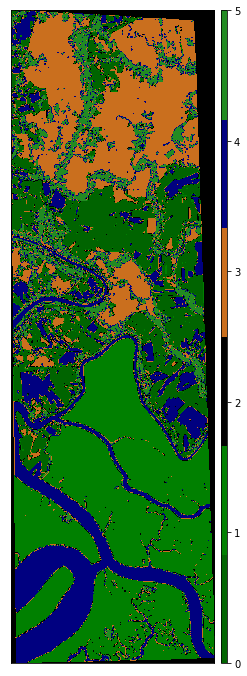

In [ ]:
# S4.3: Visualize Classification Map of KNN for land cover

epp.plot_bands(knn.predict(features_scaled).reshape((954, 298)),
              cmap = ListedColormap(['darkgreen', 'green', 'black',
                                   '#CA6F1E', 'navy', 'forestgreen']))

plt.show()

Let's compare the image obtained from classifier prediction with the images from the ground truth data and RGB composite.

<center><img src=https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/f0d48e93-4bd3-4901-bd4b-a38e52164890.png width=700></center>

<br>

In the image comparison we observe that there are virtually no differences between the classifier prediction and the ground truth. Hence the accuracy scores from the classifier agrees with the predicted results.


<br>

#### Conclusion:

1. We learned to differentiate the ground truth from the satellite data and obtain the plots from the dataset acquired by the ground monitoring team.

2. We explored that the ground truth dataset can be used to check the calibration status of the satellite detectors.

2. We can use a classifier algorithm to predict the land cover classification without utilising the RGB composite image by training the classifier from the ground truth and raster bands dataset.

3. Uses of land cover classifier models:

  - The classifier along with the ground truth data can be used to calibrate the satellite instruments to correctly interpret the information from the detectors.

  - The classifier model can be used to generate a substitute of ground truth data from scientifically calibrated satellites to minimise the need of collecting periodic ground truth data thereby reducing the associated costs.

4. For detailed analysis of the geographic area we also obtained various indices to obtain information on:

  - Vegetation density
  - Plant humidity, atmospheric moisture levels
  - Identification of surface level water channels
  - Detect the presence of minerals in the soil

Thereby, providing us meaningful scientific information from the satellite data.

Let's stop here. In the next class we will work on hyperspectral image analysis and classification on the Pavia university dataset.

---

#### Activities


**Teacher Activities:**

1.   Land Cover Classification (Class Copy)

    Link on Panel


2.  Land Cover Classification (Reference)

    Link on Panel


---